# Introducción

*Preliminares*

La ecuación de Schrödinger en el espacio de configuración es, probablemente, una de las ecuaciones que más información nos pueden dar sobre el mundo microscópico. Como toda ecuación diferencial, sólo se conocen soluciones exactas para los potenciales más sencillos. Cuando queremos considerar sistemas más elaborados hay dos sopas: usar métodos perturbativos y aproximaciones por series de potencias, o usar métodos numéricos. 

Este problema consiste en resolver la ecuación diferencial de segundo orden
$$
\left(-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right)\psi(x) = E \psi(x)
$$

donde $V(x)$ es el potencial al que está sometida la partícula y $|\psi(x)|^2$ la probabilidad de encontrarla en la posición $x$.

*Método de numerov*

El método de Numerov es un método *marchante* que, a pesar de ser relativamente fácil de implementar, puede arrojar resultados muy cercanos a la realidad.

Para derivarlo, expandimos en serie de Taylor la versión discretizada de $\psi$:
$$\psi(x_{\pm 1})=\psi(x_0) \pm \psi'(x_0) \Delta + \frac{1}{2!}\psi''(x_0)
\Delta^2 \pm \frac{1}{3!}\psi^{(3)}(x_0) \Delta^3 + \frac{1}{4!}\psi^{(4)}(x_0)
\Delta^4 \pm \frac{1}{5!}\psi^{(5)}(x_0) \Delta^5 + \mathcal{O}(\Delta^6)$$

Si sumamos estos compas, tenemos que las potencias impares se nos van:
$$\psi(x_{+ 1})+\psi(x_{- 1}) =2\psi(x_0)  + \psi''(x_0)
\Delta^2 + \frac{1}{12}\psi^{(4)}(x_0)
\Delta^4 + \mathcal{O}(\Delta^6)$$

Si definimos $\delta(g(x))=g(x+\Delta/2) - g(x-\Delta/2)$, tenemos que

$$\delta^2 = \delta(\delta(g))= g(x+\Delta)-g(x) - (g(x) - g(x-\Delta)) $$

Si le aplicamos esta chulada a $\psi$, tenemos que:

$$\delta^2(\psi_n) = \psi_{n+1}  + \psi_{n-1} - 2\psi_n  = \psi''(x_n)
\Delta^2 + \frac{1}{12}\psi^{(4)}(x_n)
\Delta^4 + \mathcal{O}(\Delta^6)$$

Ahora vemos cómo se vería la cuarta derivada como función de la segunda
derivada:

$$\delta^2(\psi''_n) = \psi''_{n+1} + \psi''_{n-1} - 2\psi''_n  = \psi^{(4)}(x_0)
\Delta^2 + \mathcal{O}(\Delta^4)$$ y lo enchufamos en la expresión anterior:

$$\delta^2(\psi_n) = \psi_{n+1} + \psi_{n-1} - 2\psi_n  = \psi''(x_n)
\Delta^2 + \frac{1}{12}\delta^2(\psi''(x_n))
\Delta^2 + \mathcal{O}(\Delta^6)$$

De la ec. de Schrödinger tenemos que $\psi''(x)=f(x)\psi(x)$, con $f(x) = V(x)-E$, que
en lenguaje discreto se ve como $\psi''_n=f_n\psi_n$. Podemos usar esto en la
ecuación anterior para cambiar poner a todas las segundas derivadas en función
de $\psi$:
$$ \psi_{n+1}+\psi_{n-1} - 2\psi_n  = f_{n}\psi_{n}
\Delta^2 + \frac{1}{12}(f_{n+1}\psi_{n+1} + f_{n-1}\psi_{n-1} - 2f_{n}\psi_{n})
\Delta^2 + \mathcal{O}(\Delta^6)$$

Ahora bien, si pasamos los $f_i\psi_i$, del lado izquierdo, se tiene que

$$ \psi_{n+1}\left(1 - \frac{\Delta^2 f_{n+1}}{12}\right) + \psi_{n-1}\left(1 - \frac{\Delta^2 f_{n-1}}{12}\right) - 2\psi_n\left(1 - \frac{\Delta^2 f_{n} }{12}\right)  = f_{n}\psi_{n}
\Delta^2 + \mathcal{O}(\Delta^6)$$ que haciendo $\phi_n = \psi_n(1-\Delta ^2 f_n/12)$ toma la forma

$$ \phi_{n+1} + \phi_{n-1}- 2\phi_n  = f_{n}\psi_{n}
\Delta^2 $$ 

O bien,
$$ \phi_{n+1} =  2\phi_n - \phi_{n-1}  + f_{n}\psi_{n}
\Delta^2 $$ 

De esta fórmula vemos que el método de numerov (como todos los métodos numéricos para segundas derivadas) necesita dos puntos iniciales para empezar a trabajar.

# Un ejemplo sencillo: pozo infinito

Consideremos la ecuación de Ezkrotinger con un potencial de la forma 
$$
V(x)
\cases{
0, x \in [0,L]\\
\infty, x \notin [0,L]
}
$$

Aunque computacionalmente no es posible usar valores no acotados, el significado físico del potencial infinito es que ahí la función de onda vale 0, lo cual nos da condiciones de frontera en $x=0$ y $x=L$. De ahora en adelante tomaremos $\hbar = L=1$ y $m=1/2$ para simplificar las ecuaciones. En ese caso, sabemos que nuestras soluciones son de la forma 
$$
\psi_n = \sin(kx); \quad k = n\pi \Rightarrow E=n^2\pi^2
$$

In [1]:
using PyPlot

In [2]:
#Definimos el numerove de izquierda a derecha
function numerov_L(N, E, f, dx)
    g(x) = (f(x) - E)
    Delta = dx
    phi = zeros(N)
    #definimos los primeros dos elementos
    phi[1] = 0
    phi[2] = 0.001(1 - Delta^2 * g(0)/12)
    #hacemos el paso iterativo
    for i in 3:N
        phi[i] = 2*phi[i - 1] - phi[i - 2] + Delta^2 * g((i - 1) * Delta) * phi[i - 1] / (1 - Delta^2 * g((i - 1) * Delta)/12)
    end
    #regresamos el valor de cada ψ_n  en un arreglo
    return [phi[i]/((1 - Delta^2 * g((i - 1) * Delta)/12)) for i in 1:N]
end
#Y la que va hacia la izquierda
function numerov_R(N, E, f, dx)
    g(x) = (f(x) - E)
    Delta = dx
    phi = zeros(N)
    #definimos los primeros dos elementos
    phi[end] = 0
    phi[end-1] = 0.001(1 - Delta^2 * g(0)/12)
    #hacemos el paso iterativo
    for i in reverse(1:N - 2)
        phi[i] = 2*phi[i + 1] - phi[i + 2] + Delta^2 * g((i + 1) * Delta) * phi[i + 1] / (1 - Delta^2 * g((i + 1) * Delta)/12)
    end
    #regresamos el valor de cada ψ_n  en un arreglo
    return [phi[i]/((1 - Delta^2 * g((i - 1) * Delta)/12)) for i in 1:N]
end



numerov_R (generic function with 1 method)


Use "plot(" instead.

Use "plot(" instead.


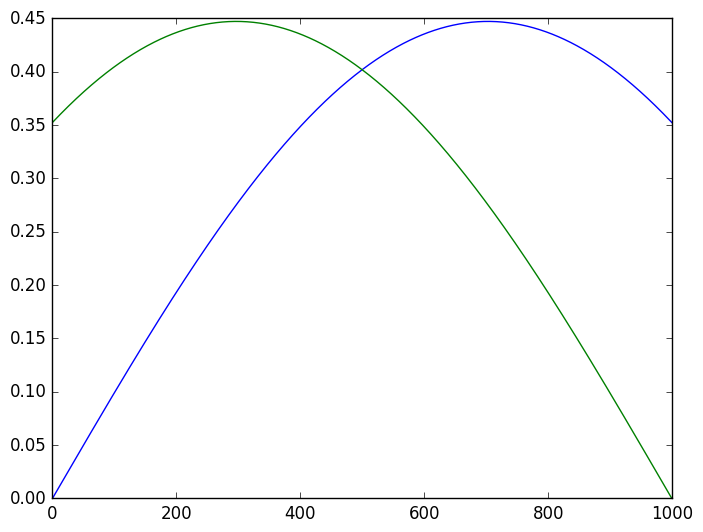

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60f1647eb8>

In [3]:
#Una pequeña prueba
using PyPlot
funcion(x) = 0
N = 1000
dx =1/N
E = 5
ψ_L = numerov_L(N, E, funcion, dx)
ψ_R = numerov_R(N, E, funcion, dx)
plot(ψ_L)
plot(ψ_R)


Para el método de disparo no hace falta usar ambas soluciones, pero es reconfortante ver que arrojan resultados similares. 

Para normalizar necesitamos calcular la integral (discreta) de nuestra función. Esta tendrá la forma $|\psi|^2=\sum\psi_i^2\Delta$:

In [3]:
function normaliza(phi, N, dx)
    norma=0
    for i in 1:N
        norma += (phi[i])^2 * (dx)#Se va acumulando el valor de la integral
    end
    return phi ./ norma #Se regresa el arreglo de ψ con cada entrada dividida entre la norma.
end

normaliza (generic function with 1 method)

Para el metodo de disparo, necesitamos una función que se regrese el valor de la solución en el extremo. Así que le hacemos algunas modificaciones a `numerov_L`.

In [4]:
function numerov_3xtr3mo(N, E, f, dx)
    g(x) = f(x) - E
    Delta = dx
    phi = zeros(N)
    phi[1] = 0
    phi[2] = 0.1(1 - Delta^2 * g(0)/12)
    for i in 3:N
        phi[i] = 2*phi[i - 1] - phi[i - 2] + Delta^2 * g((i - 1) * Delta) * phi[i - 1] / (1 - Delta^2 * g((i - 1) * Delta)/12)
    end
    #hasta ahora,  hizo lo mismo, pero aquí sólo regresa el último valor del arreglo
    i=N
    return phi[i]/((1 - Delta^2 * g((i - 1) * Delta)/12))
end

numerov_3xtr3mo (generic function with 1 method)

In [5]:
#Juntamos todo en una rutina eficiente y guapa
function numerov_shooting(N, a, b, f, dx)
    E_0 = bisec(a, b, 1, (x->numerov_3xtr3mo(N, x, f, dx)))
    normaliza((numerov_L(N, E_0, f, dx)), N, dx)
end


numerov_shooting (generic function with 1 method)

In [11]:
N=100
dx = 1/N
funcion(x)=0
ψ = numerov_shooting(N, 0, 15, funcion, dx)

100-element Array{Any,1}:
  0.0        
  2.03366    
  4.06527    
  6.09279    
  8.11418    
 10.1274     
 12.1304     
 14.1212     
 16.0978     
 18.0582     
 20.0004     
 21.9224     
 23.8224     
  ⋮          
 21.9224     
 20.0004     
 18.0582     
 16.0978     
 14.1212     
 12.1304     
 10.1274     
  8.11418    
  6.09279    
  4.06527    
  2.03366    
 -1.05579e-12

# Método de igualación

In [9]:
N = 100
x = zeros(N);

In [10]:
dx=1e-2

0.01

## Potencial

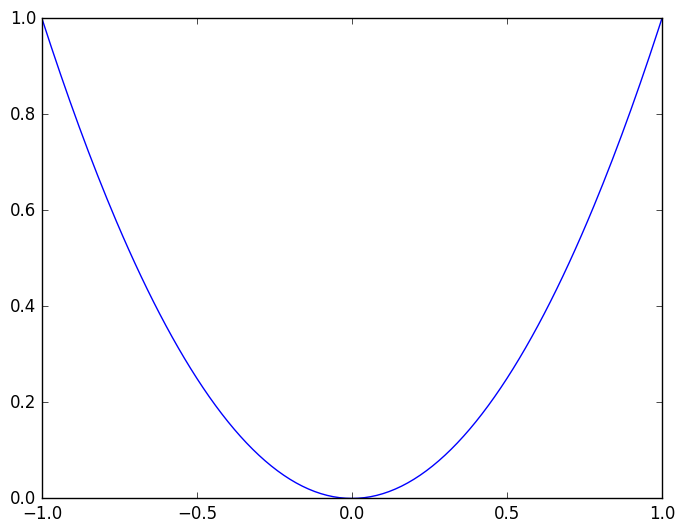

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef960470>

In [35]:
V = Float64[]

for x in -1:dx:1
    push!(V,x^2)
end

x = [-1:dx:1]
plot(x,V)

## Funciones a lo pendejo

adivinanza

In [12]:
E = 1.4

1.4

In [13]:
Ψl = zeros(V)
Ψl[1] = 0
Ψl[2] = dx

0.01

In [14]:
for i in 2:length(V) - 1
    Ψl[i+1] = 2Ψl[i] - Ψl[i-1] - 2*(dx)^2*(E-V[i])*Ψl[i]
end

In [15]:
Ψr = zeros(V)
Ψr[end] = 0
Ψr[end-1] = dx

0.01

In [16]:
for i in reverse(2:length(V) - 1)
    Ψr[i-1] = 2Ψr[i] - Ψr[i+1] - 2*(dx)^2*(E-V[i])*Ψr[i]
end

In [17]:
(Ψl[floor(end/2)]-Ψl[floor(end/2)-1])/dx

0.0032430905588909376

In [18]:
(Ψr[floor(end/2)]-Ψr[floor(end/2)-1])/dx

0.05308350167689824

In [1]:
function bisec(a,b,paso,f)
    if paso == 100
        (a + b)/2
    elseif sign(f(a)) != sign(f((a+b)/2))
        bisec(a,(a + b)/2,paso + 1,f)
    elseif sign(f(b)) != sign(f((a + b)/2))
        bisec((a + b)/2,b,paso + 1,f)
    else
        println("La función no cambia de signo en $a, $b.")
        println("Intenta con otro intervalo.")
    end
end

bisec (generic function with 1 method)

In [20]:
bisec(5.,15.,1,derivs)

LoadError: LoadError: UndefVarError: derivs not defined
while loading In[20], in expression starting on line 1

In [21]:
using PyPlot

In [22]:
x = linspace(-1,40,40)
y = [derivs(u) for u in x]
plot(x,y)

LoadError: LoadError: UndefVarError: derivs not defined
while loading In[22], in expression starting on line 2

In [23]:
function derivs(E)
    Ψl = zeros(V)
    Ψl[1] = 0
    Ψl[2] = dx
    Ψr = zeros(V)
    Ψr[end] = 0
    Ψr[end-1] = dx
    for i in 2:length(V) - 1
        Ψl[i+1] = 2Ψl[i] - Ψl[i-1] - 2*(dx)^2*(E-V[i])*Ψl[i]
    end
    for i in reverse(2:length(V) - 1)
        Ψr[i-1] = 2Ψr[i] - Ψr[i+1] - 2*(dx)^2*(E-V[i])*Ψr[i]
    end
    (Ψr[floor(end/2)]-Ψr[floor(end/2)-1])/dx-(Ψl[floor(end/2)]-Ψl[floor(end/2)-1])/dx
end

 in depwarn at deprecated.jl:73
 in to_index at deprecated.jl:447
 in getindex at array.jl:282
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/david/.julia/v0.3/IJulia/src/execute_request.jl:177
 in eventloop at /home/david/.julia/v0.3/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading In[17], in expression starting on line 1


derivs (generic function with 1 method)

In [24]:
plot(x,Ψl)
plot(x,Ψr)

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('x and y must have same first dimension',)
  File "/usr/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1427, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[24], in expression starting on line 1

Emparejamiento en un punto

Emparejamiento en un punto de las __derivadas__

In [25]:
function psis(E,a=1,b=1)
    Ψl = zeros(V)
    Ψl[1] = 0
    Ψl[2] = dx
    Ψr = zeros(V)
    Ψr[end] = 0
    Ψr[end-1] = dx
    for i in 2:length(V) - 1
        Ψl[i+1] = 2Ψl[i] - Ψl[i-1] - 2*(dx)^2*(E-V[i])*Ψl[i]
    end
    for i in reverse(2:length(V) - 1)
        Ψr[i-1] = 2Ψr[i] - Ψr[i+1] - 2*(dx)^2*(E-V[i])*Ψr[i]
    end
    plot(x,a.*Ψl)
    plot(x,b.*Ψr)
end

psis (generic function with 3 methods)

In [26]:
psis(1.3620447487342902)

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('x and y must have same first dimension',)
  File "/usr/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1427, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[26], in expression starting on line 1

In [27]:
psis(31.15239599207232)

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('x and y must have same first dimension',)
  File "/usr/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1427, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[27], in expression starting on line 1

In [28]:
psis(11.412492628419486)

LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('x and y must have same first dimension',)
  File "/usr/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1427, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[28], in expression starting on line 1

# Otro potencial

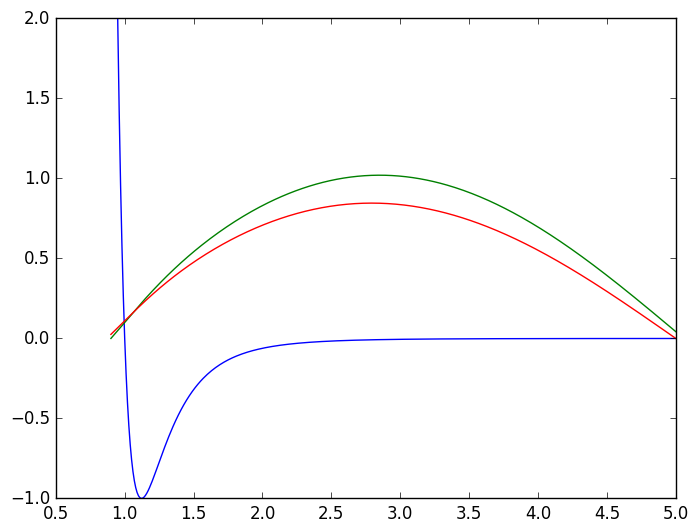

(-1,2)

 in depwarn at deprecated.jl:73
 in vect at abstractarray.jl:32
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/david/.julia/v0.3/IJulia/src/execute_request.jl:177
 in eventloop at /home/david/.julia/v0.3/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading In[29], in expression starting on line 6


In [29]:
V = Float64[]
for x in .9:dx:5
    push!(V,4(1/x^12-1/x^6))
end

x = [.9:dx:5]
plot(x,V)
psis(.25,1,.6)
ylim(-1,2)

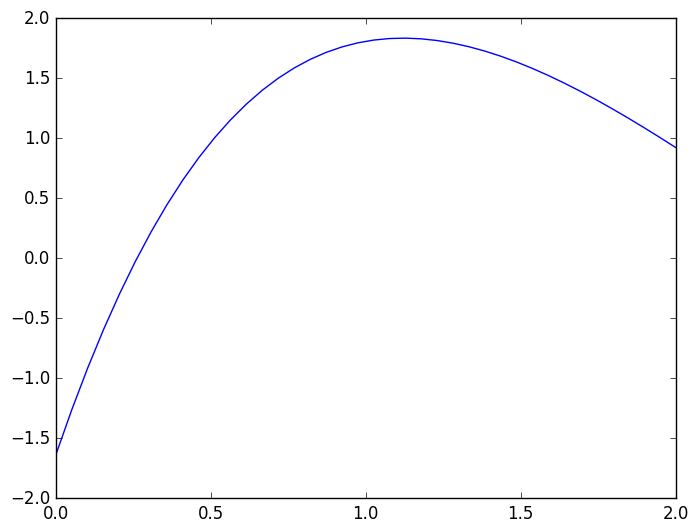

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef92a278>

In [30]:
x = linspace(0,2,40)
y = [derivs(u) for u in x]
plot(x,y)

In [31]:
bisec(0.,3,1,derivs)

0.26151226557995577

In [34]:
psis(0.2829412375635918)

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/david/.julia/v0.3/IJulia/src/execute_request.jl:177
 in eventloop at /home/david/.julia/v0.3/IJulia/src/IJulia.jl:144
 in anonymous at task.jl:447
while loading /home/david/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


LoadError: LoadError: PyError (:PyObject_Call) <class 'ValueError'>
ValueError('x and y must have same first dimension',)
  File "/usr/lib/python3.5/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/__init__.py", line 1811, in inner
    return func(ax, *args, **kwargs)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_axes.py", line 1427, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/usr/lib/python3.5/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[34], in expression starting on line 1

In [36]:
function derdes(a,b)
    valor = 0
    for i in 1:length(a)
        if minimum(abs(b-a)) == abs((b-a)[i])
            valor = i
        end
    end
    (b[valor]-b[valor-1])/dx-(a[valor]-a[valor-1])/dx
end

function funcs(E,V)
    Ψl = zeros(V)
    Ψl[1] = 0
    Ψl[2] = dx
    Ψr = zeros(V)
    Ψr[end] = 0
    Ψr[end-1] = dx
    for i in 2:length(V) - 1
        Ψl[i+1] = 2Ψl[i] - Ψl[i-1] - 2*(dx)^2*(E-V[i])*Ψl[i]
    end
    for i in reverse(2:length(V) - 1)
        Ψr[i-1] = 2Ψr[i] - Ψr[i+1] - 2*(dx)^2*(E-V[i])*Ψr[i]
    end
    Ψl,Ψr
end

function todo(e,v)
    a,b=funcs(e,v)
    derdes(a,b)
end

todo (generic function with 1 method)

In [44]:
V = Float64[]
for x in .9:dx:5
    push!(V,4(1/x^12-1/x^6))
end

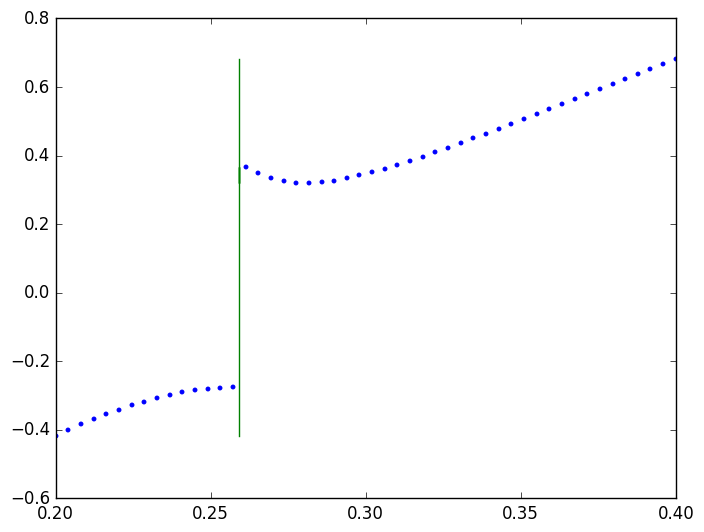

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef703828>

In [65]:
x = linspace(.2,.4)
y = [todo(u,V) for u in x]
plot(x,y,".")
plot(0.259*ones(x),y)

In [66]:
a,b=funcs(.259,V)

([0.0,0.01,0.0200102,0.0300365,0.0400815,0.0501454,0.0602263,0.0703211,0.0804259,0.0905358  …  0.0534666,0.0462185,0.0389679,0.0317154,0.0244611,0.0172057,0.00994931,0.00269243,-0.00456459,-0.0118214],[-0.0118214,0.00192919,0.0156817,0.0294469,0.0432304,0.0570342,0.0708574,0.084697,0.0985486,0.112406  …  0.0899378,0.0799564,0.069971,0.0599819,0.0499896,0.0399948,0.0299979,0.0199995,0.01,0.0])

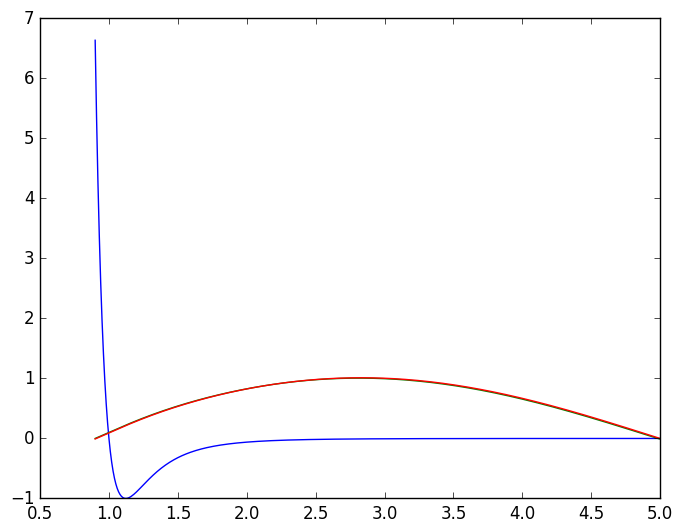

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef41fc88>

In [68]:
x = [.9:dx:5]
plot(x,V)
plot(x,a)
plot(x,.73*b)

# Oscilador armónico

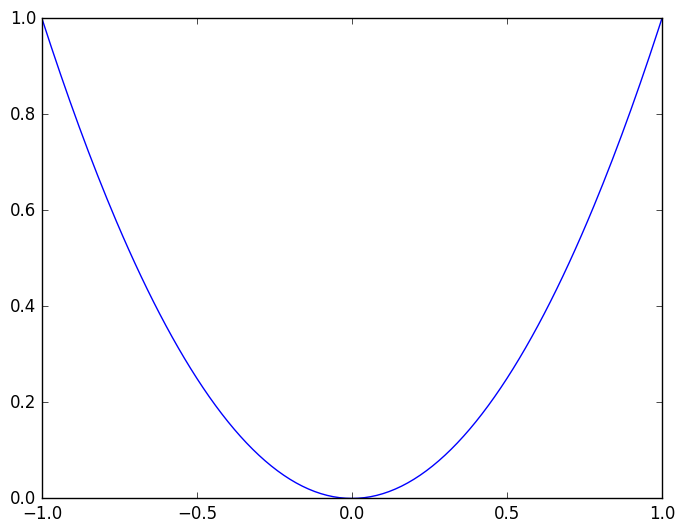

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef1ff8d0>

In [77]:
V = Float64[]

for x in -1:dx:1
    push!(V,x^2)
end

x = [-1:dx:1]
plot(x,V)

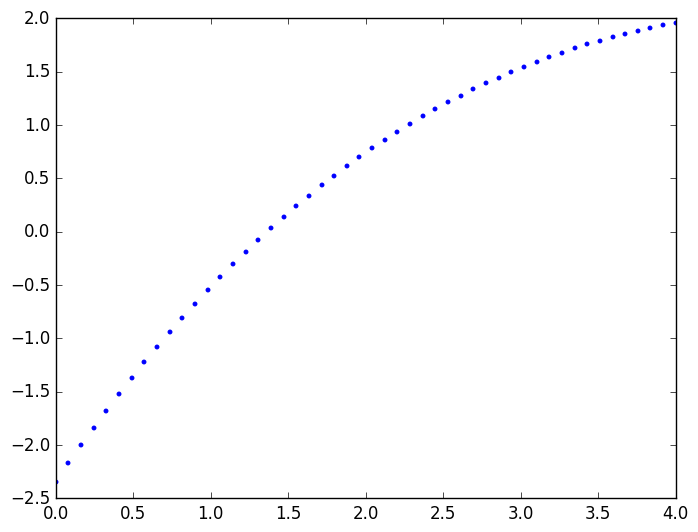

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef2a3048>

In [73]:
x = linspace(0,4)
y = [todo(u,V) for u in x]
plot(x,y,".")

In [74]:
bisec(0,4,1,x->todo(x,V))

1.3620447487342902

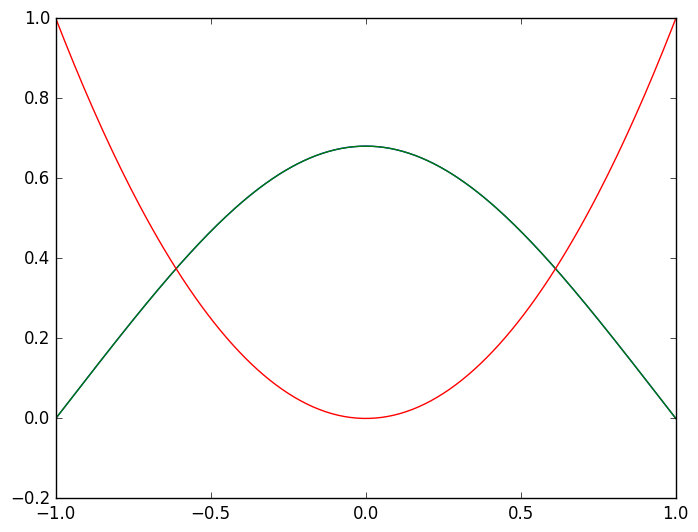

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef1f4a58>

In [78]:
a,b=funcs(bisec(0,4,1,x->todo(x,V)),V)
plot(x,a)
plot(x,b)
plot(x,V)

In [82]:
bisec(5,15,1,x->todo(x,V))

11.412492628419468

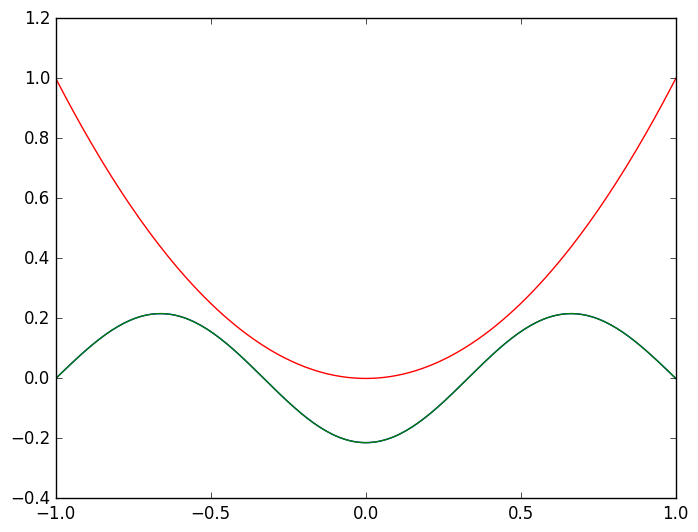

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef01e940>

In [83]:
a,b=funcs(bisec(5,15,1,x->todo(x,V)),V)
plot(x,a)
plot(x,b)
plot(x,V)

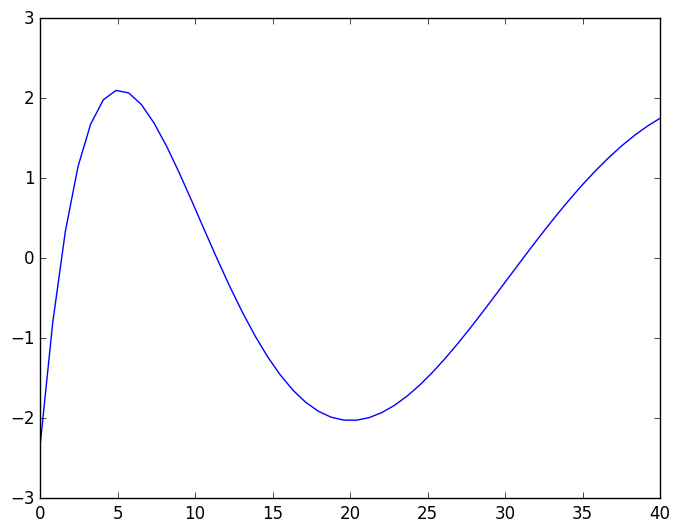

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f60ef0987b8>

In [81]:
r=linspace(0,40)
t=[todo(k,V) for k in r]
plot(r,t)